# Data Preprocessing

In [184]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [185]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datamining/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv')
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


In [186]:
# rename dataset
df.rename(columns={'Time': 'time', 'Number_of_Warts': 'number_of_warts', 'Type': 'type', 'Area': 'area', 'Result_of_Treatment': 'treatment_result'}, inplace=True)
df.head()

,gender,age,time,number_of_warts,type,area,induration_diameter,treatment_result
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


In [187]:
# info dataset untuk mengetahui tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   time                 87 non-null     float64
 3   number_of_warts      89 non-null     float64
 4   type                 85 non-null     float64
 5   area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   treatment_result     90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [188]:
# duplicated data
df.duplicated().sum() 

0

In [189]:
# jumlah null
df.isnull().sum()

gender                 0
age                    0
time                   3
number_of_warts        1
type                   5
area                   0
induration_diameter    2
treatment_result       0
dtype: int64

In [190]:
# untuk mengetahui unique value dari semua kolom
print("gender:", df["gender"].unique())
print("age:", df["age"].unique())
print("time:", df["time"].unique())
print("type:", df["type"].unique())
print("induration_diameter:", df["induration_diameter"].unique())
print("treatment_result:", df["treatment_result"].unique())

gender: [1 2]
age: [15 27 32 33 34 38 45 46 49 26 28 41 42 47 56 16 17 18 19 20 21 22 23 25
 29 30 35 40 43 51 54 24 36 48 52 53]
time: [11.   11.75 12.    1.75  5.   11.25 11.5   4.5  10.5   8.5   8.75 10.75
  4.    3.    7.75  8.    1.25  2.25  5.75  1.    9.75  6.75   nan  5.5
  6.5  10.    2.    6.    8.25  7.5   4.75  4.25  6.25  9.25  2.5   5.25
  3.75 10.25  9.    7.25]
type: [ 1.  2.  3. nan]
induration_diameter: [25.  6. 50.  7.  5.  9. nan 70.  8.  3.  2. 30. 45.]
treatment_result: [0 1]


In [191]:
# untuk menampilkan semua data yang ada karena jumlahnya tidak terlalu banyak
print(df.to_string())

    gender  age   time  number_of_warts  type  area  induration_diameter  treatment_result
0        1   15  11.00              6.0   1.0    30                 25.0                 0
1        1   27  11.75              NaN   1.0   208                  6.0                 0
2        1   32  12.00              9.0   1.0    43                 50.0                 0
3        1   33   1.75              7.0   2.0   379                  7.0                 0
4        1   34   5.00              7.0   3.0    64                  7.0                 0
5        1   38  12.00             14.0   1.0    87                  6.0                 0
6        1   45  11.25              4.0   1.0    72                  5.0                 0
7        1   46  11.50              4.0   1.0    91                 25.0                 0
8        1   49   4.50              2.0   1.0    33                  7.0                 0
9        2   15   1.75              1.0   2.0    49                  7.0                 0

In [192]:
# null handling dengan median untuk nilai continuous karena sebaran tidak normal dan modus untuk kategorikal data
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['time'].fillna(df['time'].median(), inplace=True)
df['number_of_warts'].fillna(df['number_of_warts'].median(), inplace=True)
df['induration_diameter'].fillna(df['induration_diameter'].median(), inplace=True)

df.isnull().sum()

gender                 0
age                    0
time                   0
number_of_warts        0
type                   0
area                   0
induration_diameter    0
treatment_result       0
dtype: int64

In [193]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   time                 90 non-null     float64
 3   number_of_warts      90 non-null     float64
 4   type                 90 non-null     float64
 5   area                 90 non-null     int64  
 6   induration_diameter  90 non-null     float64
 7   treatment_result     90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [194]:
# describe dataset 
df.describe()

,gender,age,time,number_of_warts,type,area,induration_diameter,treatment_result
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.238889,6.122222,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.099228,4.207612,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [195]:
# mengubah tipe data
df = df.astype({'gender': 'float64', 'number_of_warts': 'int64', 'type': 'float64', 'treatment_result': 'float64'})

In [196]:
df2 = df.copy()

# Exploratory Data Analysis

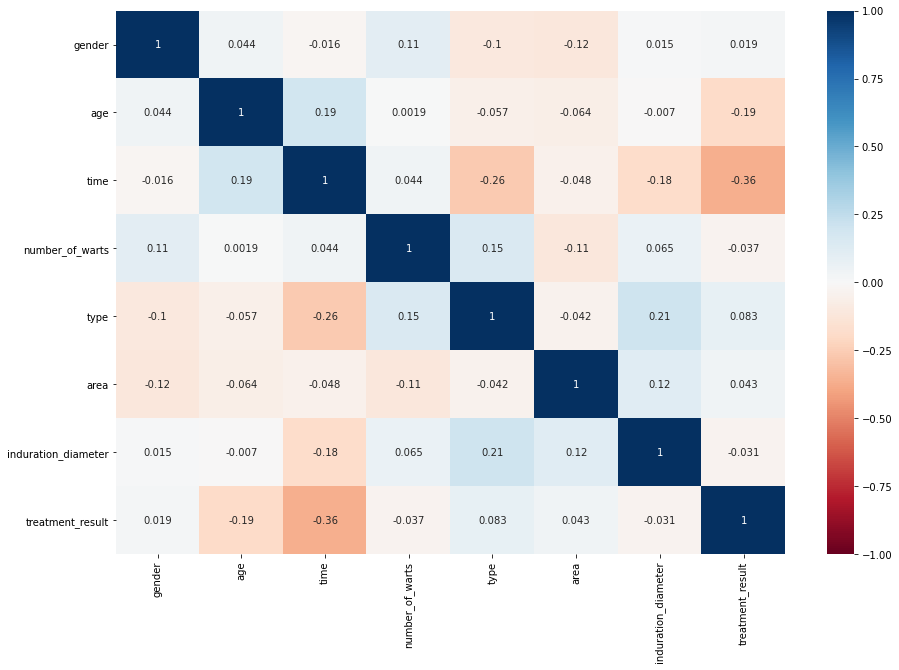

In [197]:
# Check the correlation between features and target 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

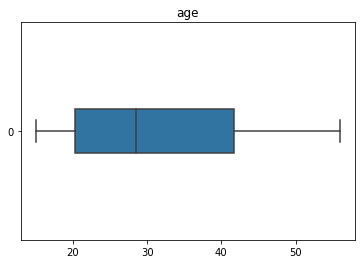

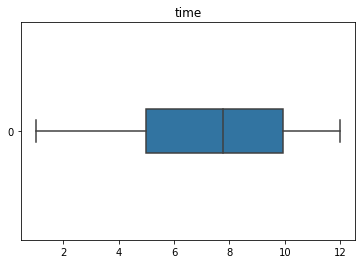

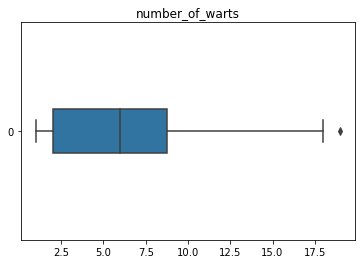

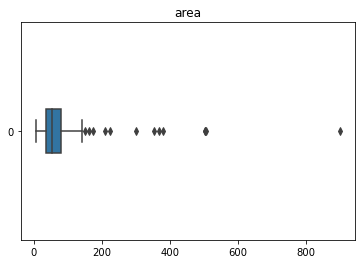

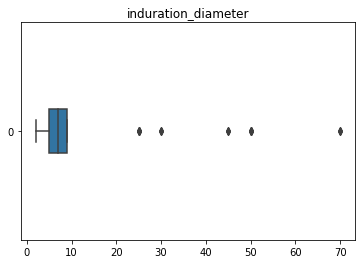

In [198]:
# boxplot untuk mengetahui sebaran/distribusi data serta outliers
sns.boxplot(data=df["age"], orient="h", width=(0.2))
plt.title("age")
plt.show()

sns.boxplot(data=df["time"], orient="h", width=(0.2))
plt.title("time")
plt.show()

sns.boxplot(data=df["number_of_warts"], orient="h", width=(0.2))
plt.title("number_of_warts")
plt.show()

sns.boxplot(data=df["area"], orient="h", width=(0.2))
plt.title("area")
plt.show()

sns.boxplot(data=df["induration_diameter"], orient="h", width=(0.2))
plt.title("induration_diameter")
plt.show()

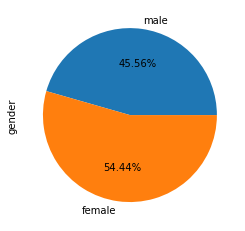

In [199]:
data = df.groupby("gender")["gender"].count()
data.plot(kind='pie', autopct='%1.2f%%', labels = ["male", "female"])
plt.show()

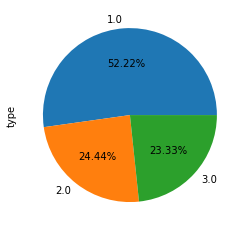

In [200]:
data = df.groupby("type")["type"].count()
data.plot(kind='pie', autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='treatment_result', ylabel='count'>

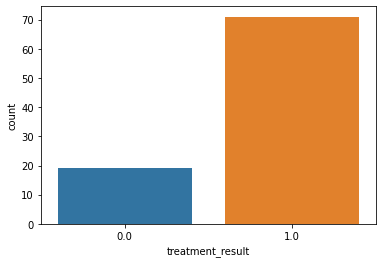

In [201]:
# visualisasi kolom treatment result
sns.countplot(x="treatment_result", data=df)

### Solving Imbalance

In [202]:
# Memisahkan prediktor dan target variabel
# Predictor Variabels
X = df.iloc[:, :-1].values
# Target Variabel
y = df.iloc[:, -1].values

In [203]:
# Menggunakan SMOTE sebagai metode oversampling
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

Class=0, n=71 (50.000%)
Class=1, n=71 (50.000%)


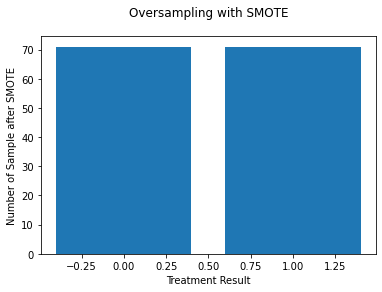

In [204]:
# Visualisasi kolom treatment result setelah penerapan SMOTE
from collections import Counter

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.title('Oversampling with SMOTE', pad=20)
plt.xlabel('Treatment Result')
plt.ylabel('Number of Sample after SMOTE')
plt.show()

# Data Modelling menggunakan Classification

### Data Transformasi

In [205]:
# Pemisahan data menjadi data testing dan data training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [206]:
# Transformasi data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [207]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = "euclidean", p = 2)
knn_classifier.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)


from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
#rf_classifier = RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
#                       min_samples_split=8, n_estimators=200)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [208]:
# Sample dari perbandingan data testing dan data predict dari masing-masing model
knn_y_pred = knn_classifier.predict(X_test)
log_y_pred = log_classifier.predict(X_test)
dt_y_pred = dt_classifier.predict(X_test)
rf_y_pred = rf_classifier.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "knn_y_pred":knn_y_pred, 
                         "log_y_pred":log_y_pred, 
                         "dt_y_pred":dt_y_pred, "rf_y_pred":rf_y_pred})
evaluate.head()

,y_test,knn_y_pred,log_y_pred,dt_y_pred,rf_y_pred
0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0


In [209]:
# Untuk menampilkan akurasi dan F1 SCore dari masing-masing model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

knn_cm = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", knn_cm)
print("KNN Accuracy Score: ", accuracy_score(y_test, knn_y_pred))
print('KNN F1 Score: ', f1_score(y_test, knn_y_pred, average='micro'))
print()
log_cm = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:\n", log_cm)
print("LOG Accuracy Score: ", accuracy_score(y_test, log_y_pred))
print('LOG F1 Score: ', f1_score(y_test, log_y_pred, average='micro'))
print()
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", dt_cm)
print("DT Accuracy Score: ", accuracy_score(y_test, dt_y_pred))
print('DT F1 Score: ', f1_score(y_test, dt_y_pred, average='micro'))
print()
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", rf_cm)
print("RF Accuracy Score: ", accuracy_score(y_test, rf_y_pred))
print('RF F1 Score: ', f1_score(y_test, rf_y_pred, average='micro'))
print()

Confusion Matrix:
 [[10  0]
 [ 1  4]]
KNN Accuracy Score:  0.9333333333333333
KNN F1 Score:  0.9333333333333333

Confusion Matrix:
 [[9 1]
 [2 3]]
LOG Accuracy Score:  0.8
LOG F1 Score:  0.8000000000000002

Confusion Matrix:
 [[8 2]
 [2 3]]
DT Accuracy Score:  0.7333333333333333
DT F1 Score:  0.7333333333333333

Confusion Matrix:
 [[9 1]
 [0 5]]
RF Accuracy Score:  0.9333333333333333
RF F1 Score:  0.9333333333333333



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


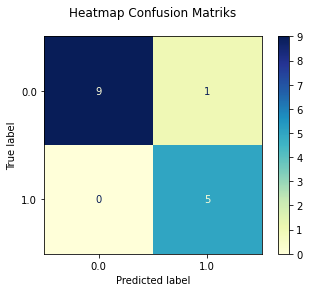

In [210]:
# Visualisasi Heatmap untuk Random Forest
from sklearn.metrics import accuracy_score, plot_confusion_matrix

plot_confusion_matrix(rf_classifier, X_test, y_test, cmap='YlGnBu')
plt.title('Heatmap Confusion Matriks', pad=20)
plt.show()

Kesimpulan dari model-model klasifikasi di atas, model klasifikasi dengan akurasi tertinggi adalah Random Forest dengan akurasi score 0.933

# Data Modelling menggunakan Regression

In [211]:
# Memisahkan prediktor dan target variabel
# Predictor Variabels
X = df[['age', 'type', 'treatment_result']]

# Target Variabel
y = df['time']

In [212]:
# Pemisahan data menjadi data testing dan data training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [213]:
# Transformasi data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [214]:
# Modelling Regresi
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [215]:
# Perbandingan y test dan y predict
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.sample(n=5)

,y_test,y_pred
45,8.00,7.702808
41,6.75,5.883222
13,11.50,9.558320
2,12.00,9.497069
30,5.75,7.090300


In [216]:
# summary
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   time   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              110.2
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                    1.55e-29
Time:                        00:42:56   Log-Likelihood:                         -242.76
No. Observations:                  90   AIC:                                      491.5
Df Residuals:                      87   BIC:                                      499.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [217]:
# Evaluation
print('LinearRegression')
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Percentage Error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))
print("Coefficient of Determination (R2): ", r2_score(y_test, y_pred))

LinearRegression
Root Mean Squared Error (RMSE):  1.6982843532120606
Mean Absolute Percentage Error (MAPE):  0.26634283408061776
Coefficient of Determination (R2):  0.6111231805350688


# Data Modelling menggunakan Clustering

In [218]:
# Data Transformation
df = df.drop(['gender', 'time', 'number_of_warts', 'area', 'age'], axis=1)

sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df))
df.head()

,0,1,2
0,-0.867403,0.622988,-1.933091
1,-0.867403,-0.486709,-1.933091
2,-0.867403,2.083116,-1.933091
3,0.352382,-0.428304,-1.933091
4,1.572168,-0.428304,-1.933091


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

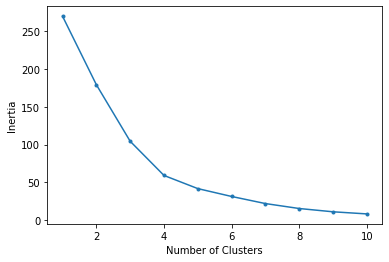

In [219]:
# Menentukan K untuk KMeans
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(df)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [220]:
# Menentukan K untuk KMeans
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ", findknee.elbow)

the best k for your model is  4


In [221]:
# Pemodelan
km_model = KMeans(n_clusters = findknee.elbow, random_state=1)
y_kmeans = km_model.fit_predict(df)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [222]:
# Evaluation
from sklearn.metrics import silhouette_score
  
ss = silhouette_score(df, km_model.labels_, metric='euclidean')
print(ss)

0.6138023567152335


In [223]:
# Table of summary
df2['K means'] = y_kmeans
df2.groupby('K means').agg(gender = ('gender', pd.Series.mode), age = ('age', 'mean'), time = ('time', 'mean'), number_of_warts = ('number_of_warts', 'mean'), tipe = ('type', pd.Series.mode), area = ('area', 'mean'), induration_diameter = ('induration_diameter', 'mean'), treatment_result = ('treatment_result', pd.Series.mode), count = ('K means', pd.Series.count))

,gender,age,time,number_of_warts,tipe,area,induration_diameter,treatment_result,count
K means,,,,,,,,,
0,1.0,31.480000,7.600000,7.040000,2.0,59.040000,6.360000,1.0,25
1,2.0,28.694444,6.784722,5.055556,1.0,115.444444,8.722222,1.0,36
2,2.0,35.473684,9.381579,6.421053,1.0,84.315789,15.368421,0.0,19
3,"[1.0, 2.0]",30.000000,3.900000,7.100000,3.0,137.900000,52.500000,1.0,10


<function matplotlib.pyplot.show(close=None, block=None)>

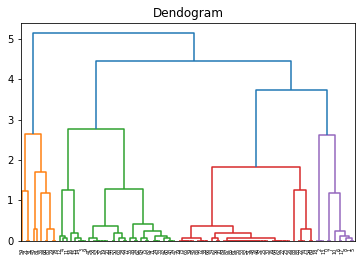

In [224]:
# Max Distance
dist_matrix = sch.linkage(df, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

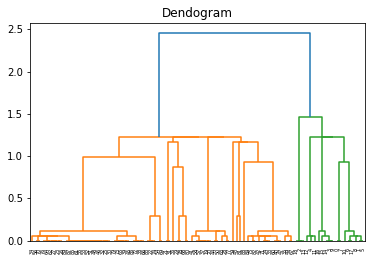

In [225]:
# Min Distance
dist_matrix = sch.linkage(df, method='single')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

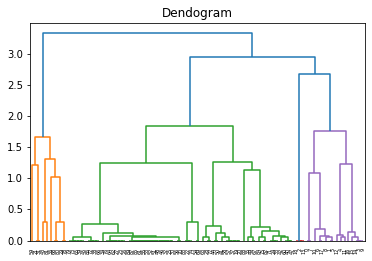

In [226]:
# Average Distance
dist_matrix = sch.linkage(df, method='average')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [227]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
y_hc = hc.fit_predict(df)

In [228]:
# Evaluation
from sklearn.metrics import silhouette_score
  
ss = silhouette_score(df, y_hc)
print(ss)

0.5447961337626296


In [229]:
# Table of Summary
df2['Hierarchical Cluster'] = y_hc
df2.groupby('Hierarchical Cluster').agg(gender = ('gender', pd.Series.mode), age = ('age', 'mean'), time = ('time', 'mean'), number_of_warts = ('number_of_warts', 'mean'), tipe = ('type', pd.Series.mode), area = ('area', 'mean'), induration_diameter = ('induration_diameter', 'mean'), treatment_result = ('treatment_result', pd.Series.mode), count = ('Hierarchical Cluster', pd.Series.count))

,gender,age,time,number_of_warts,tipe,area,induration_diameter,treatment_result,count
Hierarchical Cluster,,,,,,,,,
0,2.0,29.450000,7.070833,5.950000,1.0,93.366667,7.466667,1.0,60
1,2.0,35.473684,9.381579,6.421053,1.0,84.315789,15.368421,0.0,19
2,2.0,32.090909,4.454545,6.545455,3.0,128.090909,50.000000,1.0,11


In [230]:
df2.head()

,gender,age,time,number_of_warts,type,area,induration_diameter,treatment_result,K means,Hierarchical Cluster
0,1.0,15,11.00,6,1.0,30,25.0,0.0,2,1
1,1.0,27,11.75,6,1.0,208,6.0,0.0,2,1
2,1.0,32,12.00,9,1.0,43,50.0,0.0,2,1
3,1.0,33,1.75,7,2.0,379,7.0,0.0,2,1
4,1.0,34,5.00,7,3.0,64,7.0,0.0,2,1
